In [63]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
wine=datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [6]:
Y=wine.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [70]:
X=pd.DataFrame(wine.data,columns=wine.feature_names)
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045.0


In [71]:
scaler=StandardScaler()

In [86]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.6,random_state=10)

In [87]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [88]:
model=Lasso(alpha=0.003)

In [89]:
model.fit(X_train_scaled,Y_train)

Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
model.score(X_train_scaled,Y_train)

0.9216746246524968

In [91]:
Y_pred=model.predict(X_test_scaled)
Y_pred

array([ 0.99396914,  1.37937507,  0.110362  ,  1.08556164,  0.27098543,
        0.75544895,  1.00784827,  0.05674506,  1.96106348, -0.1853597 ,
        0.08261976,  0.54549538,  0.46914846,  1.51688474,  0.89740357,
        1.60571587,  1.3758497 ,  0.72324231,  0.99124649,  1.60518769,
       -0.07877748,  2.05872238,  0.11162302, -0.01891032,  0.99052511,
        1.7696485 ,  1.15573381,  1.78188596,  1.21228869,  1.1250151 ,
        2.16909402,  1.82146791,  1.23700504,  1.87568233,  0.5991694 ,
       -0.06177048,  0.50272274,  1.28305127,  0.23577065,  0.29833448,
       -0.29134949,  0.43071303,  1.80196575,  0.8401665 , -0.08092655,
        0.50593797,  1.62883914,  0.54093731,  1.09459215,  0.57278466,
        1.80943561,  0.51210887,  1.86436584,  0.29211234,  1.94223955,
        1.12442502, -0.04958391,  0.91930419,  1.92158922,  0.26957579,
       -0.19968661,  1.79412024,  2.1714706 ,  2.10263232,  2.04326737,
        1.11878428,  0.94474952,  1.27969972,  1.72012727,  0.38

In [92]:
Y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2])

In [93]:
model.score(X_test_scaled,Y_test)

0.8583447593952283

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

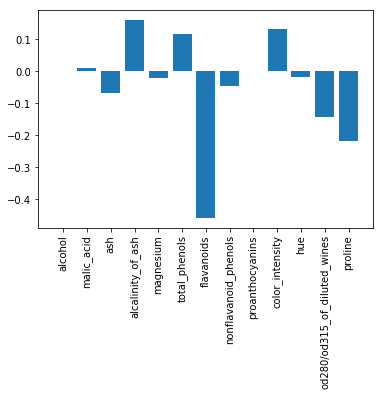

In [94]:
plt.bar(wine.feature_names,model.coef_)
plt.xticks(rotation=90)

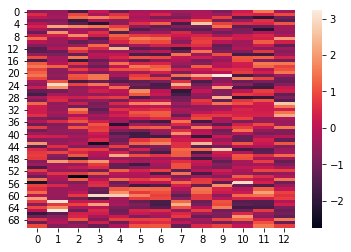

In [95]:
sns.heatmap(X_train_scaled)


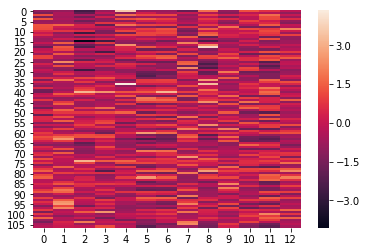

In [96]:
sns.heatmap(X_test_scaled)